## Table of contents
* [Methods](#Intro)
* [Context of Data](#COD)
* [Leukemia](#Leukemia)
    * [HSC](#HSC)
    * [Types of Leukemia](#ToL)
* [Importance of Distinction between ALL and AML](#Importance_of_Distinction_btw_ALL_and_AML)
* [Gene expression monitoring and DNA microarray](#DNA_microarray)
    * [DNA microarray mechanism and methods](#DNA_microarray_mechanism_and_methods)
* [Statistical analysis of gene expression using t-test](#t_test)
    * [Histogram and KDE plot for the Top3 key genes](#histogram_KDE)
    * [Gene information for the Top 3 key genes](#gene_info)
* [Classification](#classification)
    * [Results](#Intro)

## Methods <a class="anchor"  id="Intro"></a>
The dataset contains the gene expression levels of 7129 genes in cells from both the bone marrow and peripheral blood of patients diagnosed with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). This dataset is utilized for the classification of patients into AML and ALL categories. As there are a large number of gene features, totaling 7129, PCA is commonly used for dimensionality reduction. However, the issue with this approach is that it lumps together gene features, making it impossible to discern which specific genes play important roles in distinguishing between ALL and AML. The identification of key genes for the classification provides an insight for developing targeted treatments. Thus, in this notebook, t-tests were utilized before conducting classification. T-tests extract several gene features that have significant importance in distinguishing between ALL and AML. Subsequently, classification was conducted using the identified subset of genes.

## Context of Data <a class="anchor"  id="COD"></a>
The data used in this notebook can be found in [here](https://www.kaggle.com/datasets/crawford/gene-expression). It contains the context of data as following:

This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

There are two datasets containing the initial (training, 38 samples) and independent (test, 34 samples) datasets used in the paper. These datasets contain measurements corresponding to ALL and AML samples from Bone Marrow and Peripheral Blood. Intensity values have been re-scaled such that overall intensities for each chip are equivalent.

## **Leukemia** <a class="anchor"  id="Leukemia"></a>
Leukemia is a type of cancer that affects the blood and bone marrow. It disrupts the normal function of healthy blood cells. In bone marrow, various types of blood cells are produced by blood stem cells called hematopoietic stem cells. Leukemia develops when hematopoietic stem cells differentiate into abnormal white blood cells, crossing out healty blood cells and interfering their funcitons. Leukemia patients may become susceptible to infection and have anemia or easy bleeding.

According to the statistics provided by the Global Cancer Observatory (GCO) in 2022, Leukemia globaly ranked 13th in terms of incidence rate among various 32 cancer types, while it occupied 10th place for mortality rate. About 500 thousand new incidence cases and 300 thousand new deaths cases were reported in 2022.

### *Hematopoietic stem cells* <a class="anchor"  id="HSC"></a>
Hematopoietic stem cells differentiate into various types of blood cells. Initially, it differentiates into either lymphoid stem cell or myeloid stem cell. A lymphoid stem cell further specializes into lymphoblast. Lymphoblast then becomes one of three types of lymphocytes including B cells, T cells, and natural killer (NK) cells. A myeloid stem cell differentiates into different types of blood cells containing red blood cells, platelets, and granulocytes. White blood cells have two lineages, either from lymphoid stem cell or myeloid stem cell. B cells, T cells, and natural killer (NK) cells are lymphoid white blood cells, while granulocytes are myeloid white blood cell.

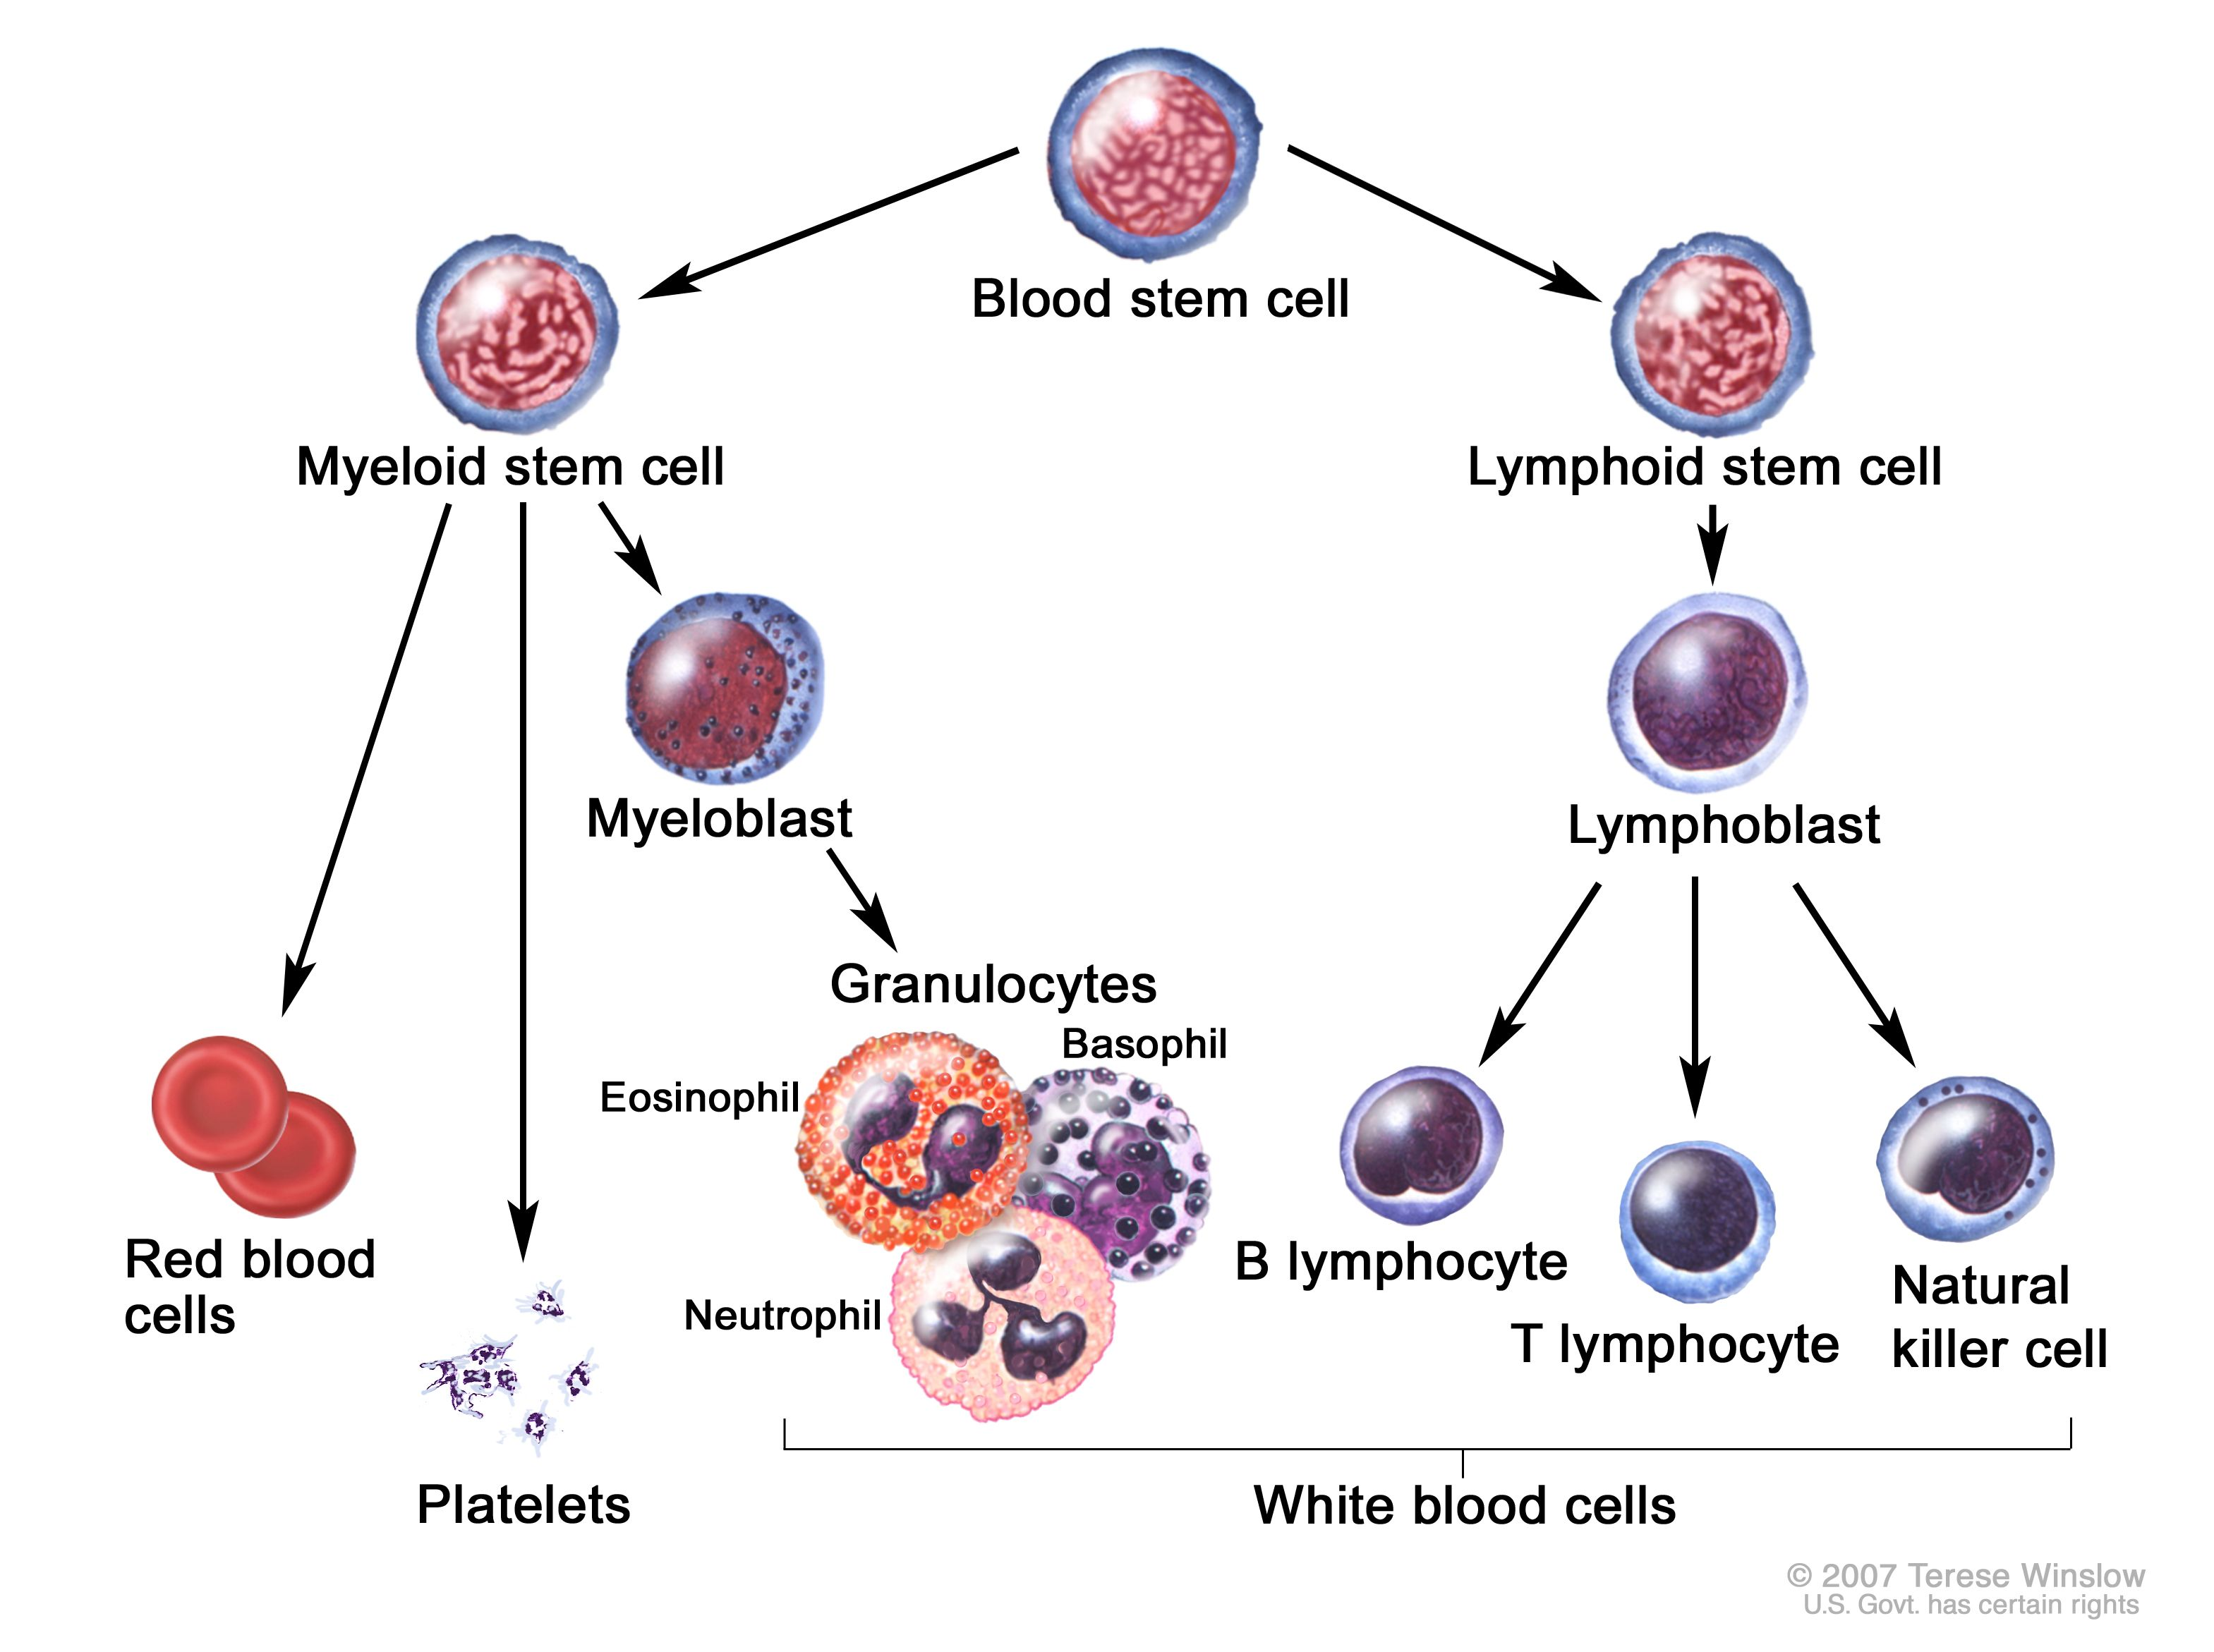

### *Types of Leukemia* <a class="anchor"  id="ToL"></a>
Leukemia is broadly classified into four main types depending on the type of white blood cells affected and the rate at which the disease progresses. Based on whether leukemia affacts lymphoid or myeloid white blood cells, it is classified as lymphoblastic leukemia or myeloid leukemia. Also, depending on the proliferation speed, it is classified as 'acute' if it is rapid, or 'chronic' if it is slow growing. Those four types of leukemia are Acute Lymphoblastic Leukemia (ALL), Acute Myeloid Leukemia (AML), Chronic Lymphocytic Leukemia (CLL), and Chronic Myeloid Leukemia (CML). Our data is focused on the ALL and AML patients.


## **Importance of distinction between ALL and AML** <a class="anchor"  id="Importance_of_Distinction_btw_ALL_and_AML"></a>
Compared to chronic leukemias, acute leukemias need earlier and faster diagnosis as they progress more rapidly and aggressively. The appearance and symptoms of ALL and AML are highly similar. However, the cure rate is remarkably diminished when ALL therapy is used for AML. Thus, accurate distinction of acute leukemias is crucial for successful treatment. Since the mere inspection of the appearance of acute leukemias for classification has significant limitations, more systematic approach of gene expression monitoring is used.



## **Gene expression monitoring and DNA microarray** <a class="anchor"  id="DNA_microarray"></a>
DNA microarray is a powerful tool to analyze the expression levels of thousands of genes within a biological sample. This technology relies on the principle of complementary base pairing to detect and quantify nucleic acid sequences. A DNA chip consists of thousands of tiny spots on which DNA probes are fixed. A probe is a short single-stranded DNA sequence complementary to a certain gene. Each spot is coated with multiple identical DNA probes.

### *DNA microarray mechanism and methods* <a class="anchor"  id="DNA_microarray_mechanism_and_methods"></a>

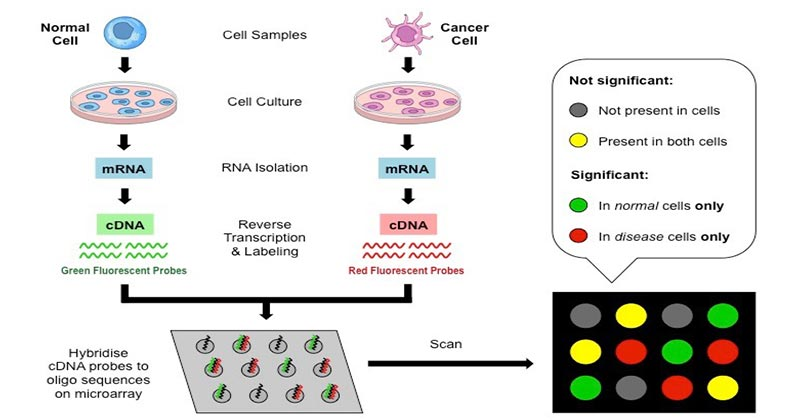

#### 1. Sample preparation <a class="anchor"  id="DNA_microarray_step1"></a>
* ##### RNA sample preparation
Initially, two RNA samples are prepared. One sample is a control RNA sample obtained from healty tissue, and the other is a RNA sample obtained from the patient's tumor tissue.
​
* ##### cDNA Transcription and fluorescent labeling
Next, the RNA is transcribed to cDNA using reversed transcription. During this step, the cDNA is fluorescently labeld. The cDNA from the healty tissue is labeled in green, and the cDNA from the patient is labeled in red.

#### *2. Loading samples to microarrays* <a class="anchor"  id="DNA_microarray_step2"></a>

Then, the cDNA samples are applied to each spot, where fluorescently labeled cDNA molecules then bind to their complementary DNA probes on the array. In each spot, one of four scenarios can occur. If neither control nor patient samples have complementary cDNA molecules to the DNA probes on the array, the spot will not display any color. Alternatively, if only the control sample contains cDNA molecules complementary to the probes, the spot will appear green. Similarly, the spot will show red if only the patient sample contains cDNA molecules complementary to the probes. Finally, if both control and patient samples have complementary cDNA molecules to the probes, the spot will display yellow.

#### *3. Fluorescence scanning and data extraction* <a class="anchor"  id="DNA_microarray_step3"></a>
After hybridization, each spot of the DNA chip is scanned using a fluorescence scanner to detect and transform the intensity of the colors into numeric values. The scanner fluorescence intensity at each spot corresponds to the expression level of the corresponding gene in the sample.

## **Data preprocessing** <a class="anchor"  id="Data_preprocessing"></a>

### Load all the required libraries

In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multitest import fdrcorrection

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

from imblearn.over_sampling import SMOTE

import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

### Load data

In [ ]:
# Loading training dataset
df_train = pd.read_csv('/kaggle/input/gene-expression/data_set_ALL_AML_train.csv')

# Loading testing dataset
df_test = pd.read_csv('/kaggle/input/gene-expression/data_set_ALL_AML_independent.csv')

print(df_train.shape)
print(df_test.shape)

The data consists of 7129 rows and 78 columns for training set, and 70 columns for testing set. Each row corresponds to one of the 7129 genes, and each column represents a single patient. Therefore, each cell contains the expression level of a specific gene for a particular patient.

### Cleaning data

we will assume that the 'call' columns, which seem to be designated for each patient, are unimportant as they do not vary significantly in values and any related information cannot be found in the paper.

In [ ]:
# Remove call columns in training dataset
columns_to_remove_train = [col for col in df_train if 'call' in col]
train = df_train.drop(columns_to_remove_train, axis=1)

# Remove call columns in testing dataset
columns_to_remove_test = [col for col in df_test if 'call' in col]
test = df_test.drop(columns_to_remove_test, axis=1)

In [ ]:
train.columns

Now we will transpose the coumns and rows so that 7129 genes become features, and each patient instance occupies a single row.

In [ ]:
# Transpose row and columns in training set
X_train = train.T

# Transpose row and columns in testing set
X_test = test.T

Let's first designate the second row containing the gene accession numbers as the column names. Then, remove both the first two rows of Gene Description and Gene Accession Number.

In [ ]:
# Set the second row (Gene Accession Number) as the column names
X_train.columns = X_train.iloc[1]  # for training set
X_test.columns = X_test.iloc[1]  # for testing set

# Drop the first two rows (Gene Description and Gene Accession Number) and reindex
X_train = X_train.iloc[2:].reset_index(drop=True)  # for training set
X_test = X_test.iloc[2:].reset_index(drop=True)  # for testing set

print(X_train.shape)
print(X_test.shape)

As most libraries work with numerical data, let's convert data values to numeric.

In [ ]:
# Convert data values to numeric for training set
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Convert data values to numeric for testing set
X_test = X_test.apply(pd.to_numeric, errors='coerce')

### Load labels

In [ ]:
# Load labels
labels = pd.read_csv('/kaggle/input/gene-expression/actual.csv')

print(labels.shape)
labels.head()

We will first merge all the data of training set, testing set, and labels. Then, check for nulls.

In [ ]:
# Merge all dataset
merged_X = pd.concat([X_train, X_test], ignore_index=True, axis=0)
merged_XY = pd.concat([merged_X, labels], axis=1)

print(merged_XY.shape)
merged_XY.head()

In [ ]:
# Check for nulls
null_counts = merged_XY.isnull().sum().max()

print('Columns with Null Values:')
print(null_counts)

In [ ]:
# Check for label imbalance
merged_XY['cancer'].value_counts()

We have much more ALL patients than AML patients. Let's also convert labels to numeric values with ALL as 0 and AML as 1.

In [ ]:
# Replace values in the 'cancer' column with 0 for 'ALL' and 1 for 'AML'
cancer_mapping = {'ALL': 0, 'AML': 1}
merged_XY['cancer'] = merged_XY['cancer'].map(cancer_mapping)

In [ ]:
print(merged_XY.shape)
merged_XY.head()

Since there are no null values, we don't need to worry about them. Now, as t-tests and many machine learning models perform better with normalized data, let's scale the data. We will use the dataframe 'merged_XY'. However, since label columns do not need to be scaled, we will first drop the label columns and then scale only the gene columns.

In [ ]:
# Exclude patient and cancer columns
gene_columns = merged_XY.columns.drop(['patient', 'cancer'])
merged_X = merged_X[gene_columns]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data (calculate mean and standard deviation)
scaler.fit(merged_X)

# Transform the data using the fitted scaler
normalized_merged_X = scaler.transform(merged_X)

# Convert back to pandas DataFrame
normalized_merged_X = pd.DataFrame(normalized_merged_X, columns=gene_columns)

# Concatenate the normalized gene expression data with the patient and cancer columns
normalized_merged_XY = pd.concat([normalized_merged_X, merged_XY[['patient', 'cancer']]], axis=1)

Later in t-test, we need separate data of ALL and AML patients. Thus, let's create the two separate normalized dataframes.

In [ ]:
# Create separate normalized DataFrames for ALL and AML patients
normalized_merged_XY_ALL = normalized_merged_XY[normalized_merged_XY['cancer'] == 0]
normalized_merged_XY_AML = normalized_merged_XY[normalized_merged_XY['cancer'] == 1]

print(normalized_merged_XY_ALL.shape)
print(normalized_merged_XY_AML.shape)

## ***Statistical analysis of gene expression using t-test*** <a class="anchor"  id="t_test"></a>

We want to identify genes that play a crucial role in distinguishing between ALL and AML. To achieve this, we need to select genes where there is a significant difference between the means of the two groups. The Student's t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. The t-test produces a t-value, which measures the difference between the means of the two groups relative to the variation in the data. The t-value is then used to calculate the p-value, which represents the probability of observing the observed difference in means (or more extreme) if the null hypothesis (no difference in means) is true. A significance level of p-value was chosen, commonly 0.05, to determine if the observed difference in means is statistically significant. If the p-value is less than the chosen significance level, then the null hypothesis is rejected, and the gene is considered significantly differentially expressed between the two groups. The smaller the p-value, the stronger the evidence against the null hypothesis, indicating that there is a significant difference between the groups.

In [ ]:
# Drop 'patient' and 'cancer' columns for each normalized_merged_XY_ALL and normalized_merged_XY_AML
normalized_merged_X_ALL = normalized_merged_XY_ALL.drop(['patient', 'cancer'], axis=1)
normalized_merged_X_AML = normalized_merged_XY_AML.drop(['patient', 'cancer'], axis=1)

Since we do not need the label columns, we have removed those columns from both ALL and AML datasets. Now, let's compute t-value and p-value for each gene and create dataframes for each of them.

why t test not anova ?
ChatGPT said:
ChatGPT
Choosing between a t-test and ANOVA depends on the specific characteristics of your data and the questions you're trying to answer. Here’s why a t-test might be more appropriate than ANOVA for your specific case of comparing gene expression levels between ALL and AML:

1. Number of Groups:
T-Test: It is designed to compare the means of two groups. In your analysis, you are directly comparing the expression levels of genes between two specific leukemia types (ALL vs. AML).
ANOVA: It is used to compare means across three or more groups. If you were comparing multiple leukemia types or other conditions, ANOVA would be more suitable.
2. Focus on Specific Comparisons:
T-Test: It allows you to focus on pairwise comparisons between the two groups, which can provide a clear understanding of how specific genes differ in expression between ALL and AML.
ANOVA: While it can provide a broader analysis, it doesn’t specify which groups differ unless you follow it with post-hoc tests. This could add complexity and require additional steps to interpret results.
3. Simplicity and Clarity:
T-Test: The results from a t-test are straightforward: you get a t-statistic and a p-value that directly indicate whether the difference in means is significant for each gene being tested.
ANOVA: While ANOVA gives an overall significance for the differences among groups, the interpretation becomes more complex if you have to conduct post-hoc tests to identify which groups are significantly different.
4. Interpretability:
The t-test results are often easier to interpret and communicate, especially in a clinical or biological context where stakeholders might not be familiar with more complex statistical methods. You can simply state that “Gene X is significantly more expressed in AML compared to ALL” based on t-test results.
5. Assumptions:
Both tests have similar assumptions regarding normality and variance homogeneity, but since you are only dealing with two groups, the assumptions are simpler to validate with a t-test.

### T-test

In [ ]:
# Perform t-test for each gene
results = []
for gene in normalized_merged_X_ALL.columns:
    t_value, p_value = ttest_ind(normalized_merged_X_ALL[gene], normalized_merged_X_AML[gene], equal_var=False)
    results.append((gene, t_value, p_value))

# Convert results list to DataFrame
df_results = pd.DataFrame(results, columns=['Gene Accession Number', 'T_Value', 'P_Value'])

# Adjust p-values for multiple testing using False Discovery Rate (FDR) correction
rejected, adjusted_p_values = fdrcorrection(df_results['P_Value'])

In [ ]:
df_results.head()

### Filtering out significant genes for the ALL and AML classification

We will filter genes with p-values less than 0.05, then sort them based on the p-values. Smaller p-value means that it has a bigger importance on distinguishing between ALL and AML patients.

In [ ]:
# Set the threshold for significance level
threshold = 0.05

# Get the list of significant genes based on the threshold
significant_genes = df_results[rejected & (adjusted_p_values < threshold)]

# Sort significant genes based on p-values
significant_genes = significant_genes.sort_values(by='P_Value')

# Add rank to significant genes DataFrame
significant_genes['Rank'] = significant_genes['P_Value'].rank()

# Display the results
print("Total Genes: 7129")
print("Significant Genes (T-test):", len(significant_genes))

In [ ]:
# Function to calculate Cohen's d
def cohen_d(x, y):
    """Calculate Cohen's d for two independent samples."""
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    mean_diff = np.mean(x) - np.mean(y)
    s = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    return mean_diff / s

# Add Cohen's d calculation to results DataFrame
cohen_d_results = []
for gene in normalized_merged_X_ALL.columns:
    d = cohen_d(normalized_merged_X_ALL[gene], normalized_merged_X_AML[gene])
    cohen_d_results.append(d)

# Add Cohen's d to df_results
df_results['Cohen_D'] = cohen_d_results

# Display results
print(df_results[['Gene Accession Number', 'T_Value', 'P_Value', 'Cohen_D']].head())


AFFX-BioC-5_at appears to be a key gene with both statistical significance (P < 0.05) and a medium effect size (Cohen's d = -0.572266). This gene could be a candidate for further investigation in the context of distinguishing between ALL and AML.
The other genes in your results do not show statistically significant differences, although they may still be of interest depending on the biological context or if more data is gathered.

In [ ]:
# Convert results list to DataFrame
df_results1 = pd.DataFrame(results, columns=['Gene Accession Number', 'T_Value', 'P_Value'])

# Adjust p-values for multiple testing using False Discovery Rate (FDR) correction
rejected, adjusted_p_values = fdrcorrection(df_results1['P_Value'])

# Add adjusted p-values to results DataFrame
df_results1['Adjusted_P_Value'] = adjusted_p_values

# Select significant genes based on adjusted p-value threshold (e.g., 0.05)
significant_genes1 = df_results1[df_results1['Adjusted_P_Value'] < 0.05]

# Print significant genes
print("Significant Genes:")
print(significant_genes)

# --- Add Hypothesis Testing Summary Here ---
# Hypothesis testing summary
for gene in significant_genes['Gene Accession Number']:
    mean_ALL = normalized_merged_X_ALL[gene].mean()
    mean_AML = normalized_merged_X_AML[gene].mean()
    print(f'Hypothesis: The mean expression of {gene} in ALL is different from AML')
    print(f'Mean ALL: {mean_ALL}, Mean AML: {mean_AML}')

In [ ]:
significant_genes_Acc = significant_genes['Gene Accession Number']

# Extracting gene expression data
significant_genes_data_all = normalized_merged_XY_ALL[significant_genes_Acc]
significant_genes_data_aml = normalized_merged_XY_AML[significant_genes_Acc]


### Heatmap of  filtered genes for ALL

In [ ]:
# For the comparison, use the same maximum absolute expression value for ALL and AML patients
max_abs_value_all = max(abs(significant_genes_data_all.values.max()), abs(significant_genes_data_all.values.min()))

# Generate heatmap for AML patients
plt.figure(figsize=(12, 8))
sns.heatmap(significant_genes_data_all, cmap='coolwarm', linewidths=0.5, linecolor='black', vmin=-max_abs_value_all, vmax=max_abs_value_all, center=0)
plt.title('Gene Expression Heatmap (Significant Genes) - ALL')
plt.xlabel('Genes')
plt.ylabel('Patients')
plt.show()

### Heatmap of filtered genes for AML

In [ ]:
max_abs_value_aml = max(abs(significant_genes_data_all.values.max()), abs(significant_genes_data_all.values.min()))

# Generate heatmap for AML patients
plt.figure(figsize=(12, 8))
sns.heatmap(significant_genes_data_aml, cmap='coolwarm', linewidths=0.5, linecolor='black', vmin=-max_abs_value_all, vmax=max_abs_value_all, center=0)
plt.title('Gene Expression Heatmap (Significant Genes) - AML')
plt.xlabel('Genes')
plt.ylabel('Patients')
plt.show()

In general, more warm color can be observed in ALL patients, whereas more cool color can be observed in AML patients. This suggests increased gene expression level in ALL patients. The color difference is particularly noticeable among the top genes on the left side of the x-axis.

### Extraction of data corresponding to the TOP3 key genes

Let's utilize the top 3 significant genes for the classification. We will extract the corresponding data from the normalized dataset 'normalized_merged_XY'.

In [ ]:
significant_genes.drop(['T_Value', 'P_Value'], axis=1, inplace=True)
significant_genes.head(3)

### **Histogram and KDE plot for the Top3 key genes** <a class="anchor"  id="histogram_KDE"></a>

In [ ]:
# Select gene expression data for both cancer types
gene_selected = 'U49248_at'
gene_selected_data_all = normalized_merged_XY_ALL[gene_selected]
gene_selected_data_aml = normalized_merged_XY_AML[gene_selected]

# Calculate mean expression for both cancer types
mean_expression_all = gene_selected_data_all.mean()
mean_expression_aml = gene_selected_data_aml.mean()

# Calculate mean difference
mean_difference = abs(mean_expression_all - mean_expression_aml)

# Plot histogram for both cancer types
plt.figure(figsize=(10, 6))

# Plot histogram for ALL
sns.histplot(gene_selected_data_all, color='blue', label='ALL', kde=True)

# Plot histogram for AML
sns.histplot(gene_selected_data_aml, color='red', label='AML', kde=True)

# Annotate mean values
plt.axvline(mean_expression_all, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (ALL): {mean_expression_all:.2f}')
plt.axvline(mean_expression_aml, color='red', linestyle='dashed', linewidth=2, label=f'Mean (AML): {mean_expression_aml:.2f}')

# Annotate mean difference
plt.text((mean_expression_all + mean_expression_aml) / 2, plt.gca().get_ylim()[1]*0.9, f'Mean Difference: {mean_difference:.2f}', ha='center')

# Set labels and title
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram for U49248')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
# Select gene expression data for both cancer types
gene_selected = 'X74262_at'
gene_selected_data_all = normalized_merged_XY_ALL[gene_selected]
gene_selected_data_aml = normalized_merged_XY_AML[gene_selected]

# Calculate mean expression for both cancer types
mean_expression_all = gene_selected_data_all.mean()
mean_expression_aml = gene_selected_data_aml.mean()

# Calculate mean difference
mean_difference = abs(mean_expression_all - mean_expression_aml)

# Plot histogram for both cancer types
plt.figure(figsize=(10, 6))

# Plot histogram for ALL
sns.histplot(gene_selected_data_all, color='blue', label='ALL', kde=True)

# Plot histogram for AML
sns.histplot(gene_selected_data_aml, color='red', label='AML', kde=True)

# Annotate mean values
plt.axvline(mean_expression_all, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (ALL): {mean_expression_all:.2f}')
plt.axvline(mean_expression_aml, color='red', linestyle='dashed', linewidth=2, label=f'Mean (AML): {mean_expression_aml:.2f}')

# Annotate mean difference
plt.text((mean_expression_all + mean_expression_aml) / 2, plt.gca().get_ylim()[1]*0.9, f'Mean Difference: {mean_difference:.2f}', ha='center')

# Set labels and title
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram for X74262')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
# Select gene expression data for both cancer types
gene_selected = 'D38073_at'
gene_selected_data_all = normalized_merged_XY_ALL[gene_selected]
gene_selected_data_aml = normalized_merged_XY_AML[gene_selected]

# Calculate mean expression for both cancer types
mean_expression_all = gene_selected_data_all.mean()
mean_expression_aml = gene_selected_data_aml.mean()

# Calculate mean difference
mean_difference = abs(mean_expression_all - mean_expression_aml)

# Plot histogram for both cancer types
plt.figure(figsize=(10, 6))

# Plot histogram for ALL
sns.histplot(gene_selected_data_all, color='blue', label='ALL', kde=True)

# Plot histogram for AML
sns.histplot(gene_selected_data_aml, color='red', label='AML', kde=True)

# Annotate mean values
plt.axvline(mean_expression_all, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (ALL): {mean_expression_all:.2f}')
plt.axvline(mean_expression_aml, color='red', linestyle='dashed', linewidth=2, label=f'Mean (AML): {mean_expression_aml:.2f}')

# Annotate mean difference
plt.text((mean_expression_all + mean_expression_aml) / 2, plt.gca().get_ylim()[1]*0.9, f'Mean Difference: {mean_difference:.2f}', ha='center')

# Set labels and title
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram for D38073')

# Add legend
plt.legend()

# Show plot

### *Gene information for the Top 3 key genes* <a class="anchor"  id="gene_info"></a>

* #### ABCC2 Gene (U49248)
The ABCC2 gene provides instructions for making a protein called ‘ATP binding cassette subfamily C member 2'. ABCC2 is a part of a family of multidrug resistance proteins responsible for transporting various substances out of cells.

* #### RBBP4 Gene (X74262)
The RBBP4 gene encodes for a protein called ‘Retinoblastoma Binding Protein 4’. RBBP4 is a nuclear protein belonging to the subfamily of WD-repeat proteins involved in histone acetylation, chromatin assembly/remodeling, transcriptional repression/silencing.

* #### MCM3 Gene (D38073)
The MCM3 gene encodes a protein known as 'minichromosome maintenance complex component 3'. MCM3 is a member of the protein family essential for the initiation and elongation phases of DNA replication in eukaryotic cells.

## ***Classification*** <a class="anchor"  id="classification"></a>

In [ ]:
# Select top n genes
top_n_genes = significant_genes.head(3)['Gene Accession Number']

# Select data for the top 50 genes from normalized_merged_XY
top_n_data = normalized_merged_XY[top_n_genes]

print(top_n_data.shape)

In [ ]:
top_n_data.head()

### Splitting the data into train and test sets

We will split the data into a training set of size 38 and a test set of size 34. These sets are the scaled versions of the train and test sets we obtained initially.

In [ ]:
# Splitting the data into train and test sets
train_size = 38
normalized_X_train = top_n_data.iloc[:train_size, :]
normalized_X_test = top_n_data.iloc[train_size:, :]

# Check the shapes of the train and test sets
print("Train set shape:", normalized_X_train.shape)
print("Test set shape:", normalized_X_test.shape)

In [ ]:
normalized_X_train.head()

In [ ]:
# Split target labels for training and testing
cancer_target = labels.iloc[:,1]
y_train = cancer_target[:38]  # Target labels for training
y_test = cancer_target[38:]  # Target labels for testing

In [ ]:
# Check for labels in train set
y_train.value_counts()

In [ ]:
# Check for labels in test set
y_test.value_counts()

### Balacing the lables using SMOTE

In [ ]:
print("Before Upsampling:-")
print(Counter(y_train))

# Use SMOTE to oversample
oversample = SMOTE()
X_train_ov, y_train_ov = oversample.fit_resample(normalized_X_train,y_train)

print("After Upsampling:-")
print(Counter(y_train_ov))

## ***Models*** <a class="anchor"  id="models"></a>

For the classification, pretrained model of Naive Bayes, Logistic Regression, and SVM were used. These can be obtained from [here](https://www.kaggle.com/code/varimp/gene-expression-classification). In addition, for model evaluation, several metrics including accuracy, True Positive Rate(TPR) and True Negative Rate (TNR) were used. In our context, those metrics signify the following:

* Accuracy: the proportion of correctly classified patients (both ALL and AML) out of all patients
* True Positive Rate (TPR/Recall): the proportion of correctly classified AML patients out of all actual AML patients
* True Negative Rate (TNR/Specificity): the proportion of correctly classified ALL patients out of all actual ALL patients

### Naive Bayes

In [ ]:
# Create a Gaussian classifier
nb_model = GaussianNB()

# Fit the Naive Bayes model on the training data
nb_model.fit(X_train_ov, y_train_ov)

# Predict labels for the testing data
nb_pred = nb_model.predict(normalized_X_test)

# Evaluate the accuracy of Naive Bayes classification
print('Naive Bayes accuracy:', round(accuracy_score(y_test, nb_pred), 3))

# Compute confusion matrix
cm_nb = confusion_matrix(y_test, nb_pred)

# Extract true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) from confusion matrix
TN, FP, FN, TP = cm_nb.ravel()

# Calculate True Positive Rate (Recall) for AML class
TPR_aml = TP / (TP + FN)

# Calculate True Negative Rate (Specificity) for ALL class
TNR_all = TN / (TN + FP)

print('True Positive Rate (Recall) for AML class:', round(TPR_aml, 3))
print('True Negative Rate (Specificity) for ALL class:', round(TNR_all, 3))

# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_nb, annot=True, ax=ax, fmt='g', cmap='Greens') 

# Labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(['ALL', 'AML']) 
ax.yaxis.set_ticklabels(['ALL', 'AML'], rotation=360);

### Logistic Regression

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the grid of hyperparameters
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10], 
            'penalty': ['l1', 'l2']}

# Create a logistic regression estimator
log_estimator = LogisticRegression(solver='liblinear')

# Create a grid search object
log_model = GridSearchCV(estimator=log_estimator, 
                         param_grid=log_grid, 
                         cv=3,
                         scoring='accuracy')

# Fit the grid search to find the best parameters
log_model.fit(X_train_ov, y_train_ov)

# Print the best parameters found by the grid search
print("Best Parameters:\n", log_model.best_params_)

# Select the best logistic regression model
best_log = log_model.best_estimator_

# Make predictions using the optimized model
log_pred = best_log.predict(normalized_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, log_pred)
print('Logistic Regression accuracy:', round(accuracy, 3))

# Compute confusion matrix
cm_log = confusion_matrix(y_test, log_pred)

# Extract true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) from confusion matrix
TN, FP, FN, TP = cm_log.ravel()

# Calculate True Positive Rate (Recall) for AML class
TPR_aml = TP / (TP + FN)

# Calculate True Negative Rate (Specificity) for ALL class
TNR_all = TN / (TN + FP)

print('True Positive Rate (Recall) for AML class:', round(TPR_aml, 3))
print('True Negative Rate (Specificity) for ALL class:', round(TNR_all, 3))

# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_log, annot=True, ax=ax, fmt='g', cmap='Greens') 

# Labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(['ALL', 'AML']) 
ax.yaxis.set_ticklabels(['ALL', 'AML'], rotation=360);

In [ ]:
# Extract feature importance (coefficients)
feature_importance = best_log.coef_[0]

# Match feature importance with feature names
feature_names = X_train_ov.columns.tolist()
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort feature importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

# If you want to visualize feature importance, you can create a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

### Support Vector Machine (SVM)

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
    "kernel": ["linear", "rbf", "poly"],
    "decision_function_shape": ["ovo", "ovr"]
} 

# Create SVM grid search classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)

# Train the classifier
svm_grid.fit(X_train_ov, y_train_ov)

# Print the best parameters found by the grid search
print("Best Parameters:\n", svm_grid.best_params_)

# Select the best SVC model
best_svc = svm_grid.best_estimator_

# Make predictions using the optimized parameters
svm_pred = best_svc.predict(normalized_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_pred)
print('SVM accuracy:', round(accuracy, 3))

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, svm_pred)

# Extract true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) from confusion matrix
TN, FP, FN, TP = cm_svm.ravel()

# Calculate True Positive Rate (Recall) for AML class
TPR_aml = TP / (TP + FN)

# Calculate True Negative Rate (Specificity) for ALL class
TNR_all = TN / (TN + FP)

print('True Positive Rate (Recall) for AML class:', round(TPR_aml, 3))
print('True Negative Rate (Specificity) for ALL class:', round(TNR_all, 3))

# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax=ax, fmt='g', cmap='Greens') 

# Labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(['ALL', 'AML']) 
ax.yaxis.set_ticklabels(['ALL', 'AML'], rotation=360);

## ***Results*** <a class="anchor"  id="results"></a>
* Naive Bayes accuracy: 0.735
* Logistic Regression accuracy: 0.765/0.794/0.824
* SVM accuracy: 0.735/0.824

Logistic Regression showed strength in correctly identifying AML, while SVM showed better performance at correctly identifying ALL.

**Limiation:**
Results fluctuated in each iteration for logistic regression and SVM. Possible solution would be setting random seed.

## Reference
Golub, T. R., Slonim, D. K., Tamayo, P., Huard, C., Gaasenbeek, M., Mesirov, J. P., Coller, H., Loh, M. L., Downing, J. R., Caligiuri, M. A., Bloomfield, C. D., & Lander, E. S. (1999). Molecular classification of cancer: Class Discovery and class prediction by Gene Expression Monitoring. Science, 286(5439), 531–537. https://doi.org/10.1126/science.286.5439.531
 
Varimp. (2019, April 2). Gene expression classification. Kaggle.
https://www.kaggle.com/code/varimp/gene-expression-classification
 
Crawford, C. (2017, August 8). Gene expression dataset (golub et al..). Kaggle. https://www.kaggle.com/datasets/crawford/gene-expression/code?datasetId=1868&sortBy=voteCount

Nageshsingh. (2020, December 31). Classification of cancer. Kaggle. https://www.kaggle.com/code/nageshsingh/classification-of-cancer

## Reference for images
Adult Acute Lymphoblastic Leukemia treatment. National Cancer Institute. (n.d.). https://www.cancer.gov/types/leukemia/patient/adult-all-treatment-pdq

Karki, G. (2020, June 6). DNA microarray: Principle, types and steps involved in cdna microarrays. Online Biology Notes. https://www.onlinebiologynotes.com/dna-microarray-principle-types-and-steps-involved-in-cdna-microarrays/